In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

### 1a 
plotting (x,v)

In [3]:
def file_process(s):
    f = open(s, "r")
    lines = f.readlines()
    f.close()
    convert = []
    result = []

    for line in lines:
        for element in line.split():
            convert.append(float(element))
        result.append(convert)
        convert = []

    result = np.array(result)
    return result

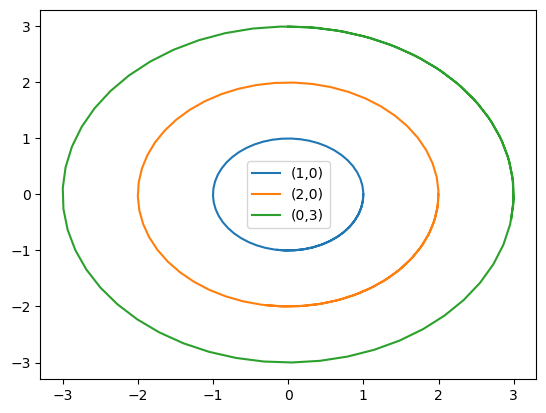

In [4]:
result1 = file_process("result1_l.txt")
result2 = file_process("result2_l.txt")
result3 = file_process("result3_l.txt")

time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
plt.plot(x, v, label = "(1,0)")

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
plt.plot(x, v, label = "(2,0)")

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
plt.plot(x, v, label = "(0,3)")

plt.legend()
plt.show()

### 1b
non linear

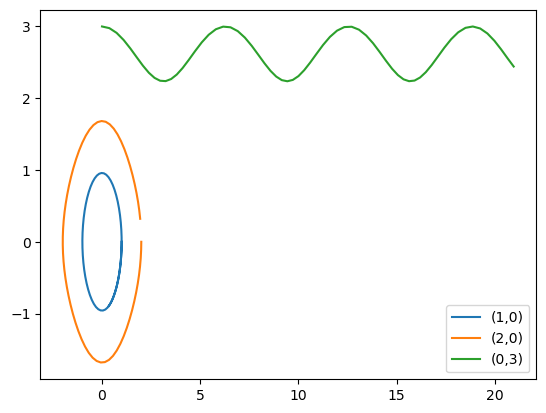

In [5]:
result1 = file_process("result1.txt")
result2 = file_process("result2.txt")
result3 = file_process("result3.txt")

time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
plt.plot(x, v, label = "(1,0)")

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
plt.plot(x, v, label = "(2,0)")

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
plt.plot(x, v, label = "(0,3)")

plt.legend()
plt.show()

Simulation of solar sphere

In [6]:
def accel(m: int, x: np.ndarray, eps_sq: float) -> np.ndarray:
    """Compute accelerations for harmonic oscillator(s)

    Args:
        m (array of shape (N,)): masses of points
        x (array of shape (N, 3)): positions of points
        eps_sq (float): softening parameter

    Returns:
        a (array of shape (N, 3)): accelerations of points
    """
    n = len(m)  # number of points
    a = np.zeros((n, 3))  # initialize accelerations
    for i in range(n):  # loop over all points...
        break
    return a

In [7]:
def leapstep(m: np.ndarray, x: np.ndarray, v: np.ndarray, dt: float, eps_sq: float):
    """Take one step using the leapfrog integrator, formulated
    as a mapping from t to t + dt.  WARNING: this integrator is not
    accurate unless the timestep dt is fixed from one call to another.

    Args:
        m (array of shape (N,)): mass of all points
        x (array of shape (N, 3)): coordinate of all points
        v (array of shape (N, 3)): velocities of all points
        dt (float): timestep for integration
        eps_sq (float): softening parameter (epsilon^2)
    """
    v += 0.5 * dt * accel(m, x, eps_sq) # advance vel by half-step
    x += dt * v # advance pos by full-step
    v += 0.5 * dt * accel(m, x, eps_sq) # complete velocity step

In [8]:
def save_state(m, x, tnow):
    """Save the current state to file.

    Args:
        m (array of shape (N,)): masses of all points
        x (array of shape (N, 3)): positions of all points
        tnow (float): current time, in seconds
    """
    with open("leapint.py.data", "a") as f:
        for i in range(len(m)):  # loop over all points...
            #f.write("%8.4f%12.6f%12.6f%12.6f%12.6f\n" % (tnow, m[i], x[i][0], x[i][1], x[i][2]))

            # modified write format to prevent data cluster and read failure
            f.write(format(tnow, '.5f') + " "+format(m[i], '12.6f') +" "+ format(x[i][0], '12.6f') + " "+format(x[i][1], '12.6f') + " "+format(x[i][2], '12.6f')+ "\n")

# orbital simulation

In [ ]:
def main():

    # first, set up initial conditions
    n = 9  # set number of points
    tnow = 0.0  # set initial time, in year

    # next, set integration parameters
    tmax = 5.0  # number of steps to take
    dt = 0.01  # timestep for integration
    mstep = tmax / dt # total number of steps

    # order: mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto
    #distance = np.array([57900000.0, 108200000.0, 149600000.0, 227900000.0, 778600000.0, 1433500000.0, 2872500000.0, 4495100000.0, 5906380000.0]) #km
    #distance = distance*10**3 # set it to 10^-12 meter scale

    distance = [0.39, 0.72, 1, 1.52, 5.2, 9.58, 19.18, 30.07, 39.5] # distance in au
    x = np.zeros((n,3)) # 3-d position
    v = np.zeros((n,3))
    # set initial position and velocity 
    # assume in x and y direction with equal length
    for i in range(n):
        x[i] = [np.sqrt((distance[i]**2)/2), np.sqrt((distance[i]**2)/2), 0]
        #x[i] = [distance[i], 0, 0] #  only in x direction
        v[i] = [0.0,0.0,0.0]
    # intial sun position
    sun_pos = np.array([0.0, 0.0, 0.0])
    # Gravitational constant and Sun's mass
    G = 0.00011859645 #6.6743*10**-11
    M = 332946 #1.9891*10**30


    # delete old output if it exists
    if os.path.exists("solar.py.data"):
        os.remove("solar.py.data")    


    # save intial state
    save_state(n,x,tnow)

    # leapfrog integration
    for i in range(int(mstep)):
        x, v = leapstep(x,v,n,dt,G,M, sun_pos, debugger=i)
        tnow = tnow + dt
        save_state(n, x, tnow)




def leapstep(x, v, n, dt, G, M, sun_pos, debugger):
    """LEAPSTEP: take one step using the leapfrog integrator, formulated
    as a mapping from t to t + dt.  WARNING: this integrator is not
    accurate unless the timestep dt is fixed from one call to another.
    Args:
        x (np.array): positions of all points
        v (np.array): velocities of all points
        n (int): number of planets
        dt (float): timestep for integration
        sun_pos (3-d np.array): position of the sun
        debugger: debug purposes (not using)
    Returns:
        x: positions
        v: velocities
    """
    
    v = v + 0.5*dt*accel(x,n,G,M,sun_pos)
    x = x + v*dt
    v = v + 0.5*dt*accel(x,n,G, M, sun_pos)


    return x,v


def accel(x: np.ndarray, n: int, G: float, M: float, sun_pos: np.ndarray):
    """ACCEL: compute accelerations for harmonic oscillator(s)
    Args:
        x a (array of shape (n, 3)): positions of planets
        n (int): number of planets
        G (float): gravitational constant
        M (float): mass of sun
        sun_pos a (array of shape (1,3)): position of the sun
    
    Returns:
        a (array of shape (N, 3)): accelerations of points
    """
    a = np.zeros((n,3))
    for i in range(n):
        r_vec = x[i] - sun_pos
        r_mag = np.sqrt((r_vec**2).sum())
        acc = -(G*M*r_vec/r_mag**3)
        if i==2:
            print(acc, r_vec)
        a[i] = acc
    return a

def save_state(n, x, tnow):
    """Save the current state to file.

    Args:
        n : size
        x (array of shape (N, 3)): positions of all points
        tnow (float): current time, in 0.01 year
    """
    with open("solar.py.data", "a") as f:
        for i in range(n):  # loop over all points...
            f.write(format(tnow, '.5f') + " " + format(x[i][0], '12.6f') + " "+format(x[i][1], '12.6f') + " "+format(x[i][2], '12.6f')+ "\n")

main()

# plotting
reading from "solar.py.data"

In [9]:
with open("solar.py.data") as f:
    content = f.readlines()

earth = []

for i in range(len(content)):
    if (i+1)%9 == 3:
        line = (content[i].replace('\n', '')).split(" ")
        line = list(filter(lambda x: x != '', line))
        earth.append([float(line[0]),float(line[1]), float(line[2]), float(line[3])])

earth = np.array(earth)



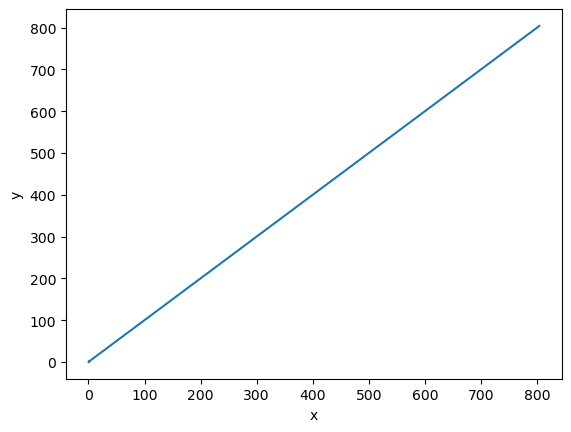

In [12]:
plt.plot(earth[:,1], earth[:,2])
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("earth orbital motion x versus y.png")

In [11]:
print(earth[:,1]) # x-position
print(earth[:,2]) # y-position

[ 7.07107000e-01  7.05711000e-01  7.01512000e-01  6.94476000e-01
  6.84545000e-01  6.71635000e-01  6.55631000e-01  6.36378000e-01
  6.13679000e-01  5.87272000e-01  5.56818000e-01  5.21861000e-01
  4.81777000e-01  4.35680000e-01  3.82227000e-01  3.19219000e-01
  2.42511000e-01  1.42065000e-01 -2.75530000e-02  1.64178800e+00
  3.31061100e+00  4.97930600e+00  6.64794500e+00  8.31655300e+00
  9.98514000e+00  1.16537140e+01  1.33222770e+01  1.49908320e+01
  1.66593810e+01  1.83279250e+01  1.99964650e+01  2.16650010e+01
  2.33335340e+01  2.50020650e+01  2.66705940e+01  2.83391200e+01
  3.00076450e+01  3.16761680e+01  3.33446900e+01  3.50132110e+01
  3.66817310e+01  3.83502490e+01  4.00187670e+01  4.16872830e+01
  4.33557990e+01  4.50243140e+01  4.66928290e+01  4.83613420e+01
  5.00298560e+01  5.16983680e+01  5.33668800e+01  5.50353920e+01
  5.67039030e+01  5.83724140e+01  6.00409240e+01  6.17094340e+01
  6.33779440e+01  6.50464530e+01  6.67149620e+01  6.83834700e+01
  7.00519780e+01  7.17204